# Erarbeitung der Funktion np.linspace() 

am Beispiel der Erstellung einer Wertetabelle für eine lineare Funktion

Die Funktion `np.linspace()` des Moduls `numpy` ist ein Hilfsmittel zur Erzeugung von gleichmäßig verteilten Zahlen in einem Intervall. Es gibt verschiedene Möglichkeiten, solche Zahlenfolgen zu erzeugen. Das Modul `numpy` ist für das Rechnen mit Zahlenwerten optimiert, die sich als Folgen von Zahlen schreiben lassen.

Beachten Sie, dass es sich eingebürgert hat, das Modul `numpy` mittels

`import numpy as np`

zu importieren und die Objekte in diesem Modul deshalb als `np.object` angesprochen werden.

Im folgenden Beispiel wird der Gasverbrauch von zwei Kunden miteinander verglichen. Dazu sind die Verbrauchskosten in € abhängig von der benötigten Jahresleistung in $\mathrm{kWh}$ in einem Diagramm dargestellt.

Solche Visualisierungen werden häufig benutzt, um Zusammenhänge zwischen verschiedenen Größen leicht verständlich darzustellen.

# Beispiel

Herr Meyer, Besitzer eines Einfamilienhauses, rechnet
mit einem jährlichen Verbrauch von $20\;000\,\mathrm{kWh}$ Gas zur
Beheizung seines Gebäudes und zur Warmwasserbereitung. Er bezieht
das Gas über einen örtlichen Anbieter zu folgenden Konditionen:
*Grundgebühr* pro Jahr 384.00 €, *Arbeitspreis* $5.5\,\frac{\mathrm{ct}}{\mathrm{kWh}}$.

Herr Schmidt, Kollege von Herrn Meyer, ist Besitzer einer
Einliegerwohnung mit einem Gasverbrauch von $12\;000\,\mathrm{kWh}$
pro Jahr und berichtet Herrn Meyer begeistert von einem Konkurrenzangebot, bei dem
eine jährliche *Grundgebühr* von 144.00 € bei einem
*Arbeitspreis* von $6.8\,\frac{\mathrm{ct}}{\mathrm{kWh}}$ zu zahlen ist.

Die Kostenentwicklung ist in Abhängigkeit vom Jahresverbrauch im folgenden Diagramm dargestellt:

![](Beispiel_1.pdf)

Das Diagramm zeigt leicht verständlich, dass Herr Schmidt bei einem Jahresverbrauch von $12\;000\,\mathrm{kWh}$ mit seinem Tarif (rot) besser fährt. 

Es zeigt aber auch, dass die günsterige Grundgebühr ab etwa $18\;400\,\mathrm{kWh}$ von dem höheren Arbeitspreis ausgeglichen wird und ab diesem Punkt der Tarif von Herrn Meyer (blau) günstiger ist.

Um ein Diagramm zu erzeugen, wird eine Wertetabelle benötigt. Darin wird für bestimmte Werte auf der $x$-Achse der zugehörige Wert auf der $y$-Achse berechnet.

<p style="margin-top:20cm;">

#### Die Funktionsaufrufe zur Konstruktion des oben genutzten Diagramms

In der folgenden Zelle sind alle Befehle aufgeführt, die zur Ausgabe des Eingangs gezeigten Diagramms führen. Viele dieser Befehle sind noch nicht besprochen. Die Aufrufe dienen deshalb nur zu Ihrer Information

In [1]:
from matplotlib import pyplot as plt, ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina' # nur MacBook Pro
import pandas as pd
import numpy as np

In [2]:
# Das Intervall auf der x-Achse
lx = np.linspace(0,20000)

# Der DataFrame mit den x-Werten und zwei Spalten für die y-Werte
df = pd.DataFrame(
    {
        'x': lx,
        'Meyer': 384 + 5.5e-2*lx,
        'Schmidt': 144 + 6.8e-2*lx
    }
)

df.head()

,x,Meyer,Schmidt
0,0.000000,384.000000,144.000000
1,408.163265,406.448980,171.755102
2,816.326531,428.897959,199.510204
3,1224.489796,451.346939,227.265306
4,1632.653061,473.795918,255.020408


Alle Plotbefehle zur Erzeugung eines Diagramms müssen in einer Zelle stehen:

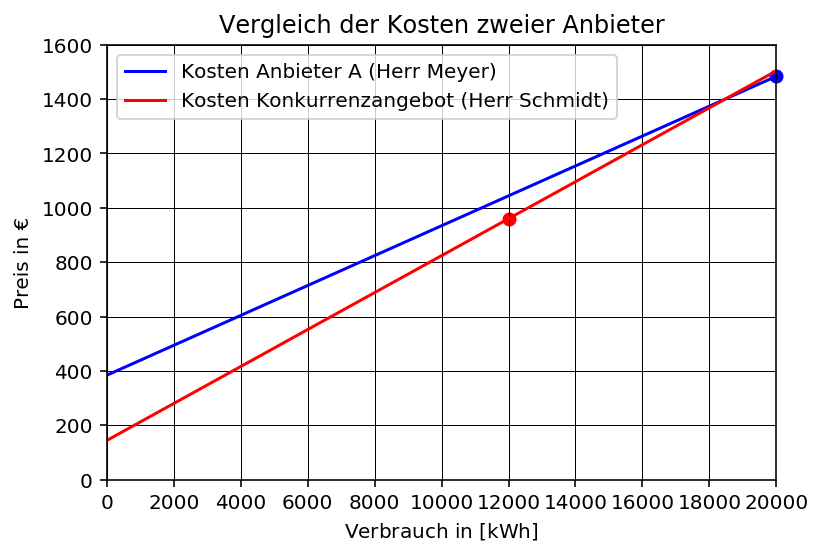

In [3]:
# Der Plot
ax = df.plot(
    title='Vergleich der Kosten zweier Anbieter', # der Titel des Diagramms
    x='x', # die x-Achse
    y=['Meyer','Schmidt'], # zwei Graphen
    label=['Kosten Anbieter A (Herr Meyer)','Kosten Konkurrenzangebot (Herr Schmidt)'], # je Graph ein Label
    color=['b','r'], # ... und eine Farbe
)

# Die Punkte "Verbrauch Meyer" und "Verbrauch Schmidt"
ax.scatter(20000, 384+5.5e-2*20000,c='b',clip_on=False)
ax.scatter(12000, 144+6.8e-2*12000,c='r')

# zusätzliche Parameter:
ax.set(
    xlim=(0,20000),ylim=(0,1600), # Grenzen des Plots auf der x- und y-Achse
    xlabel='Verbrauch in $[\mathrm{kWh}]$', # Bezeichnung der x-Achse
    ylabel='Preis in €', # Bezeichnung der y-Achse
)

# Anpassung der Aufteilung der x-Achse
ax.xaxis.set_major_locator(tk.MultipleLocator(2000))

# Gitternetzlinien im Plot anzeigen
ax.grid(c='k',lw=0.5)

# Zum Speichern entfernen Sie das Kommentarzeichen in der nächsten Zeile
#plt.savefig('Beispiel_1.pdf',bbox_inches='tight')